In [1]:
import os
import datetime

import matplotlib as mpl

import pandas as pd

import roq


SETTINGS = roq.client.Settings2(
    app={
        "name": "trader",
    },
    loop={
        "timer_freq": datetime.timedelta(milliseconds=100),
    },
    service={},
    common={},
)


CONFIG = roq.algo.strategy.Config(
    legs=[
        roq.algo.Leg(
            source=0,
            account="A1",
            exchange="deribit",
            symbol="BTC-PERPETUAL",
            time_in_force=roq.TimeInForce.GTC,
        ),
        roq.algo.Leg(
            source=1,
            account="A1",
            exchange="bybit",
            symbol="BTCUSD",
        ),
    ],
    strategy_id=123,
)


def create_strategy(dispatcher, order_cache, config):
    return roq.algo.strategy.create(
        type=roq.algo.strategy.Type.ARBITRAGE,
        dispatcher=dispatcher,
        order_cache=order_cache,
        config=config,
        parameters="max_age=10s;threshold=5;quantity_0=1;min_position_0=-5;max_position_0=5",
    )


def create_reporter():
    return roq.algo.reporter.create(
        type=roq.algo.reporter.Type.SUMMARY,
    )


def create_matcher(dispatcher, order_cache, config):
    return roq.algo.matcher.create(
        type=roq.algo.matcher.Type.SIMPLE,
        dispatcher=dispatcher,
        order_cache=order_cache,
        config=config,
    )


FACTORY = roq.algo.Factory(
    create_strategy=create_strategy,
    create_reporter=create_reporter,
    create_matcher=create_matcher,
)


PARAMETERS = [
    "{HOME}/var/lib/roq/data/deribit-public.roq".format(**os.environ),
    "{HOME}/var/lib/roq/data/bybit-public.roq".format(**os.environ),
]

In [2]:
reporter = roq.client.Simulator2.dispatch(
    settings=SETTINGS,
    factory=FACTORY,
    config=CONFIG,
    parameters=PARAMETERS,
)

L0 simple.cpp:100] [0:deribit] connected
L0 simple.cpp:100] [1:bybit] connected
L0 simple.cpp:127] [0:deribit] ready
L0 simple.cpp:127] [1:bybit] ready
L0 simple.cpp:106] [0:deribit] disconnected
L0 simple.cpp:106] [1:bybit] disconnected


In [3]:
result = reporter.extract("history")
print(result)

{'data': {'source': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8), 'exchange': ['deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'deribit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit', 'bybit'], 'symbol': ['BTC-PERPETUAL', 'BTC-PERPETUAL', 'BTC-PERPETUAL', 'BTC-PERPETUAL', 'BTC-PERPETUAL', 'BTC-PER

In [4]:
df = pd.DataFrame(result["data"]).set_index(result["index"])
df

best_bid_price  \
source exchange symbol        sample_period_utc                     
0      deribit  BTC-PERPETUAL 1730473620000000000         71145.5   
                              1730473680000000000         71107.5   
                              1730473740000000000         70975.0   
                              1730473800000000000         70941.5   
                              1730473860000000000         70938.0   
...                                                           ...   
1      bybit    BTCUSD        1730475180000000000         70575.5   
                              1730475240000000000         70615.5   
                              1730475300000000000         70539.5   
                              1730475360000000000         70463.5   
                              1730475420000000000         70319.5   

                                                   best_ask_price  buy_volume  \
source exchange symbol        sample_period_utc                                 
0      deribit  BTC-PERPETUAL 1730473620000000000         71146.0         0.0   
                              1730473680000000000         71108.0        17.0   
                              1730473740000000000         70975.5        22.0   
                              1730473800000000000         70942.0        42.0   
                              1730473860000000000         70938.5        58.0   
...                                                           ...         ...   
1      bybit    BTCUSD        1730475180000000000         70576.0       525.0   
                              1730475240000000000         70616.0       526.0   
                              1730475300000000000         70540.0       552.0   
                              1730475360000000000         70464.0       561.0   
                              1730475420000000000         70320.0       581.0   

                                                   sell_volume  position  \
source exchange symbol        sample_period_utc                            
0      deribit  BTC-PERPETUAL 1730473620000000000          6.0      -6.0   
                              1730473680000000000         23.0      -6.0   
                              1730473740000000000         28.0      -6.0   
                              1730473800000000000         48.0      -6.0   
                              1730473860000000000         64.0      -6.0   
...                                                        ...       ...   
1      bybit    BTCUSD        1730475180000000000        519.0       6.0   
                              1730475240000000000        520.0       6.0   
                              1730475300000000000        546.0       6.0   
                              1730475360000000000        555.0       6.0   
                              1730475420000000000        585.0      -4.0   

                                                   average_price  mark_price  \
source exchange symbol        sample_period_utc                                
0      deribit  BTC-PERPETUAL 1730473620000000000   71142.000000     71146.0   
                              1730473680000000000   71144.000000     71108.0   
                              1730473740000000000   71142.250000     70975.5   
                              1730473800000000000   70938.500000     70942.0   
                              1730473860000000000   70955.083333     70938.5   
...                                                          ...         ...   
1      bybit    BTCUSD        1730475180000000000   70517.500000     70575.5   
                              1730475240000000000   70514.166667     70615.5   
                              1730475300000000000   70544.000000     70539.5   
                              1730475360000000000   70488.500000     70463.5   
                              1730475420000000000   70319.500000     70320.0   

                                                   unrealized_profit 

<Axes: xlabel='sample_period_utc'>

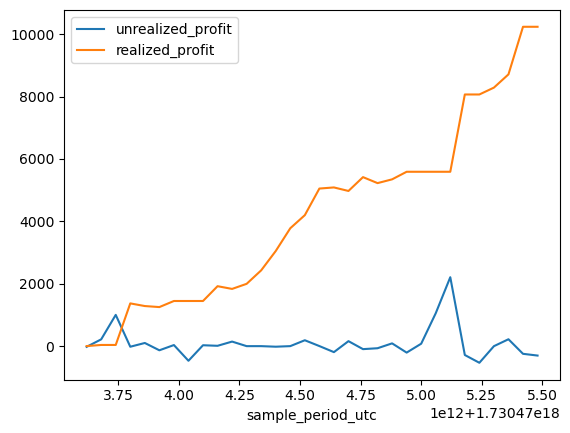

In [5]:
df.loc[(0,'deribit','BTC-PERPETUAL')][['unrealized_profit','realized_profit']].plot()

<Axes: xlabel='sample_period_utc'>

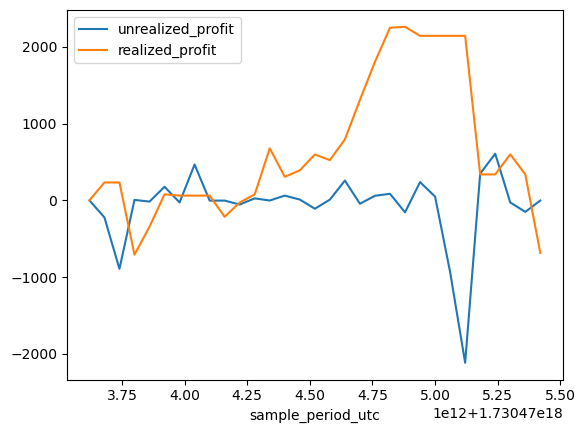

In [6]:
df.loc[(1,'bybit','BTCUSD')][['unrealized_profit','realized_profit']].plot()